## A simple scikit-LEarn Classification workflow:
1. Getting the data ready
2. Picking a model
3. Fitting the model to the data and making prediction
4. Evaluating
5. Experimenting/tuning
6. Saving

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Getting the data ready 

In [3]:
hd = pd.read_csv("heart_disease.csv")

In [4]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
x = hd.drop("target",axis =1)
y = hd["target"]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

## 2. Choosing the estimator
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

## 3. Fitting the model to the data and using it to make a model



In [8]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# Make predictions
y_preds = model.predict(x_test)

In [10]:
y_preds

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [11]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3


In [12]:
# Make a prediction on a single sample (has to be array)
model.predict(np.array(x_test.loc[76]).reshape(1, -1))

KeyError: 76

In [ ]:
# On the training set
model.score(x_train, y_train)

In [ ]:
# On the test set (unseen)
model.score(x_test, y_test)

In [ ]:
## 5. Experimenting
np.random.seed(42)
for i in range(10,50,1):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test)}")
    print("")

In [ ]:
# tryng different number of estimators with cross-validation and no cross-validation
from sklearn.model_selection import cross_val_score
np.random.seed(42)
for i in range(10, 50, 1):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test set: {model.score(x_test,y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, x, y,cv =5)) * 100} %")
    print("")

In [ ]:
## 4.2 Evaluating a model using the scoring paramaeter


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
heart_disease= pd.read_csv("heart_disease.csv")
x = heart_disease.drop("target",axis =1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [2]:
clf.score(x_test,y_test)

0.8524590163934426

In [3]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [4]:
np.random.seed(42)
# Single training and test split score
clf_single_score = clf.score(x_test,y_test)
# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

##  4.2.1 Classification model evaluation metrics 


1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators =100)
cross_val_score= cross_val_score(clf,x,y,cv=5)


In [6]:
np.mean(cross_val_score)

0.8248087431693989

In [7]:
print(f"Heart Disease Classifier Cross-Validated Accuray: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuray: 82.48%


## Area under the receiver operating characteristic curve (AUC/ROC)

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's positive rate (fpr).
- Trur positive = model predicts 1 when truth is 1
- false positive = model predicts 1 when truth is 0
- true negative = model predicts 0 when truth is 0
- false negative = model predicts 0 when truth is 1.

In [8]:
# Create x_test .. etc
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [9]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(x_train,y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [10]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [11]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

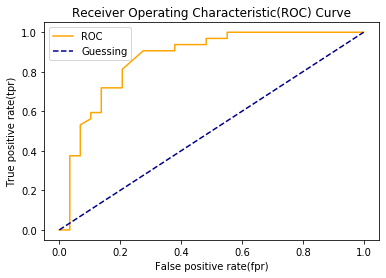

In [12]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """"
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # Plot roc curve 
    plt.plot(fpr,tpr, color = "orange", label = "ROC")
    
    # Plot line with no predictive power (basseline)
    
    plt.plot([0,1],[0,1],color = "darkblue", linestyle = "--",label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristic(ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)    

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)


0.8669181034482759

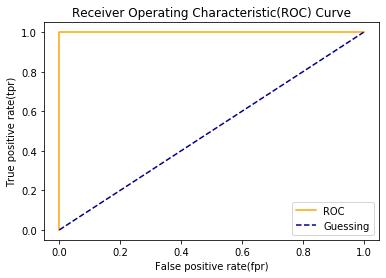

In [14]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [15]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

** Confusion MAtrix** 

 A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
 
 In essence, giving you an idea of where the model is getting confused.
 

In [16]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [17]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [18]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

In [ ]:
# Set the font scale
sns.set